# Project : Predicting Boston Housing Prices

## Introduction
In this project, we will evaluate the performance and predictive power of a DecisionTreeRegressor model on data collected from homes in suburbs of Boston, Massachusetts. The aim of the model is to make predictions about the monetary value of a home which would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project is Boston housing data collected in 1978. Each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain missing or censored values and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an outlier and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining non-relevant features have been excluded.
- The feature `'MEDV'` has been multiplicatively scaled to account for 35 years of market inflation.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
We will make a cursory investigation about the Boston housing data and provide observations, then separate the dataset into features and the target variable. The features, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The target variable, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Calculate Statistics
We calculate descriptive statistics about the Boston housing prices.

In [3]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Description
Feature descriptions from the Boston housing dataset: 
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

### Feature Analysis

* Increasing RM should increase MEDV since a greater number of rooms means more square footage which is tied to the price per square foot of a home. 

* Increasing LSTAT should decrease MEDV since more working poor means that house prices are lower to accommodate more limited budgets and reflect on the lower costs overall of services and maintenance in these areas. 

* Increasing PTRATIO should decrease MEDV since a larger ratio of students to teachers means lower quality of instruction due to fewer schools and fewer teachers available because of less taxes drawn from the neighborhood to pay for education as the area is populated by lower income households

## Developing a Model

### Performance Metric
To measure the quality of our model we will use the coefficient of determination, R<sup>2</sup>, to quantify the model's performance. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. If our model is given a negative R<sup>2</sup>, ith indicates that the model is no better than one that naively predicts the mean of the target variable.

In [4]:
# Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Goodness of Fit Test
Using five random data points we explore the hypothetical case that our model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


Our model successfully captures the variation of the target variable. The resulting R^2 of 0.923 says that 92.3 percent of the variance of the target variable is explained by the features. The closer the R^2 is to 100% the more it indicates that the model explains the variability of the response variable around its mean, or in other words, that the model fits the data.

### Shuffle and Split Data
We split the data into training and testing subsets. The data is shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [6]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Training and Testing Splits

Splitting the dataset into training and testing subsets allow for a portion of the data to be used to build a general algorithm of the model without overfitting it then applying it on the unseen part of the data to test whether it behaves within the expected accuracy of the model, that is, we check how well it fits the data and makes predictions.

## Model Performance Analysis
We'll look at the model's learning and testing performances on various subsets of training data by investigating an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. The shaded region of a learning curve denotes the uncertainty of that curve, measured as the standard deviation. The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

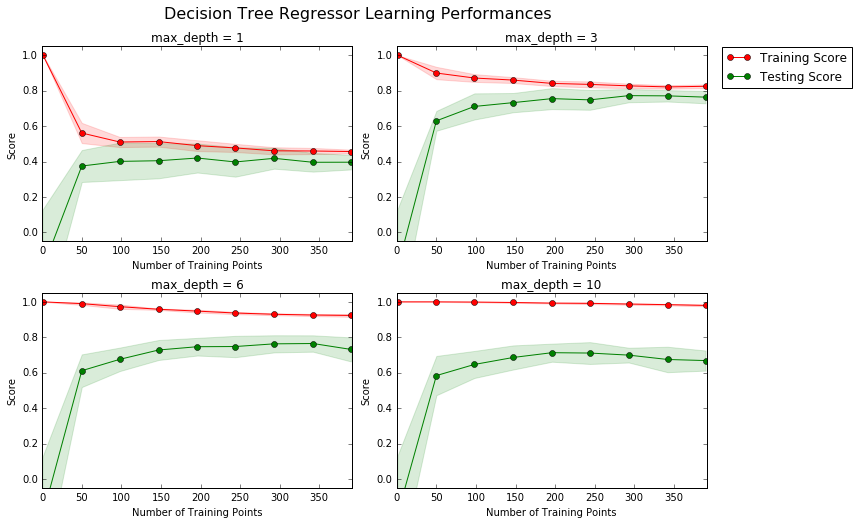

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Graph Analysis

Graph with a max_depth = 3: The score of the training curve decreases slightly as the number of training points increases while the score of the testing curve increases slightly for every 50-point increase in training points. Both flatten out at about 200 training points without significant improvement in score. Both learning curves appear to converge to a score of 0.8. More training points do not seem to benefit the accuracy of the model as it doesn't appear to gain additional value-added information.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves: one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.  

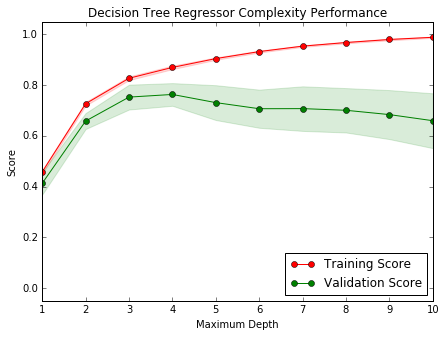

In [8]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff Analysis

Training with a maximum depth of 1, the model suffers from high bias as it underfits by being simpler, failing to generalize well to unseen data. When it's trained with a maximum depth of 10, it suffers from high variance as it overfits to every noise in the training data but fails to make better predictions to unseen data. The high bias can be seen in the graph with the lower score and lower depths while the high variance is shown by the divergent curves of the Training (trending to higher scores) and Validation Scores (trending to lower scores) and by the higher maximum depths.

### Optimal Model Analysis

At a maximum depth of 4 it results in a model that best generalizes to out-of-bag data.  Looking at the Complexity Curve which provides detailed information on the maximum depths, the testing score peaks at a max_depth of 4 and the training score moves up a notch. Afterwards the testing score deteriorates while the training score keeps on improving evidencing overfitting. (The 4 Learning Performance graphs provide a hint that confirm this. The best testing score peaks at about 0.8 when the max depth is 3 before both training and testing scores start diverging with the testing score worsening and the training score getting better as a sign of overfitting).

## Model Performance Evaluation

### Grid Search

The grid search technique is an optimization search method that looks for the best parameters for an estimator such that it optimizes a score measure. To optimize a learning algorithm, we specify the estimator we want to use, the parameters we wish to optimize and their range of values (the combination of these parameter values make up the parameter grid). It will return the mix of parameter values that yield the best fit score of the unseen data using cross validation. GridSearchCV works similar to nested for-loops where each of the estimator's parameters is a for-loop nested within another parameter's for-loop so each combination of their values can be passed to the model until the one with the best score is obtained. A completed iteration of this set of for-loops is only for a subset of a Cross-Validation k-partitioned dataset. The set of for-loops needs to run for the remaining k-1 subsets giving out k scores where the parameters with the most consistent best score will be chosen.

### Cross-Validation

K-fold cross-validation training is a model validation technique whose aim is to get a more accurate assessment of how the model will perform with unseen data. It derives k random, equal-sized training/testing subsets out of an original dataset then performs on each of the subsets testing on a single partitioned subsample and training on the remaining subsamples. Finally it averages out their k scores.  When using k-fold cross-validation with gridsearch, it minimizes the biases that can occur with some parameters playing out better with a subset of data. Over many rounds, these errors should smooth out to show the parameters that behave generally better with unseen data.

### Fitting the Model
We'll train the decision tree algorithm using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

In [9]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable.

### Optimal Model

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


The optimal model have a max_depth of 4. This result confirms the conclusion arrived visually in Q6 that the best max_depth is 4 to get the best R^2 score to predict unseen data.

### Predicting Selling Prices
In the instance of a real estate agent in the Boston area looking to use this model to help price homes owned by his/her clients that they wish to sell, we can explore three hypothetical scenarios:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |

Our model helps us recommend a price each client can sell his/her home at.

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


The model recommends clients to sell their home according to the predictions given by the decision tree algorithm (numbers rounded to the nearest 1000s): 
* Client 1 home: 403,000
* Client 2 home: 237,000
* Client 3 home: 932,000

These prices seem reasonable given the values for the respective features. As per the reasoning in Q1 Feature Observation, Client 3 has the best house since it has the most rooms (60% more than Client 2), lowest level of neighborhood poverty level (about 5 times less than Client 2) and lowest student-teacher ratio. Having all 3 favorable features, its price is well above the mean and median prices, nearly 3 standard deviations above the mean, and near the maximum price. The second best home, as per the features, belongs to Client 1. It has the second most rooms, second best poverty level (88% better than Client 3) and second best student-teacher ratio (about 47% better than Client 3). As such, its price is also ranked second, just below the mean and the median, meaning it's a representative home in the Boston area. Lastly, Client 2's home has the worst features of all three placing its price the lowest of all 3 clients, closer to the minimum price at about 1.3 standard deviations below from the mean.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. To understand the sensitivity of our model, we'll run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [12]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Application in a Real-World Setting

- The constructed model should not be used in today's real-world setting. The UCI-MLR data collected in 1978 has properties that makes it inappropriate to predict prices today: (a) it belongs only to suburbs and does not include downtown and metropolitan Boston where residential constructions have grown ever since, (b) it is not clear how the the data was obtained, whether from random sampling in all suburbs or selectively volunteered by housing authorities in a few suburbs (among other concerns), (c) the economy and businesses have grown a lot since 1978 supplying far more expensive housing than the model can predict with its maximum of $1.024MM (d) changes in lifestyle, commuting times, and family orientation have drawn more people to live in metro Boston than in suburbs bringing up more high-end, few-rooms apartments, (e) neighborhoods where gentrification programs have a few years going, better housing have been built but poverty rates and student-teacher ratios may remain the same which can understate the real value of these new units, (f) new government programs to improve student-teacher ratios in poor neighborhoods can lower this number but leave intact the poverty rate and the number of rooms per home where the model can give erroneous pricing.
- The features present in the data may not be sufficient to describe a home today.  As per the instructions that 'non-relevant features have been excluded', one can assume that the 3 remaining features were the result of having applied dimensionality reduction, therefore, they can describe a home in the 1978 data. However, to describe a home today, we'd need to take into consideration all the points discussed in the previous paragraph which can alter the number and types of features we'd choose.
- The model does not seem robust enough to make consistent predictions. The decision tree algorithm may not be the best one to use since its predictions are bound to the data it has.  A potential model to explore is linear regression which can make good inferences on general, new data. Moreover, the 506 data points may not be representative enough (as discussed in paragraph 1(a)(b)) to allow the model to adequately capture price in all of Boston. 
- Data collected in an urban city like Boston wouldn't be applicable in a rural city. The crowdiness of Boston makes real estate expensive, or in other words, each additional room expensive. In a rural city, more square footage can be bought for less money making it more commonplace to have more rooms and the pricing scale for each additional room much more different than in a big city. Poverty rates per area can vary greatly too since rural cities have less budget to combat poverty making segregation of neigborhoods by income more pronounced. The student-teacher ratios in the better schools in a rural city may not be as good as in Boston and in the poorer neighborhoods they could be worse than in an urban city. Rural cities besides having less budget for public schools, their residents have lower income than those in larger cities and less able to attract more teachers to its schools to improve this ratio. 
- To adapt the model to a real-world setting, all of the above hypotheses need to be tested to current data and different models then optimized.